In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
house = pd.read_csv("kc.csv") #i called the csv file kc for abreviation 
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Data analysis

In [6]:
house['date'] = house['date'].str.extract(r'(\d+)', expand=False)
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
house.drop(['id'],axis=1,inplace=True) #we are deleting the id column because we won't need it tis time
house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
house['price'].mean()

540088.1417665294

<AxesSubplot:>

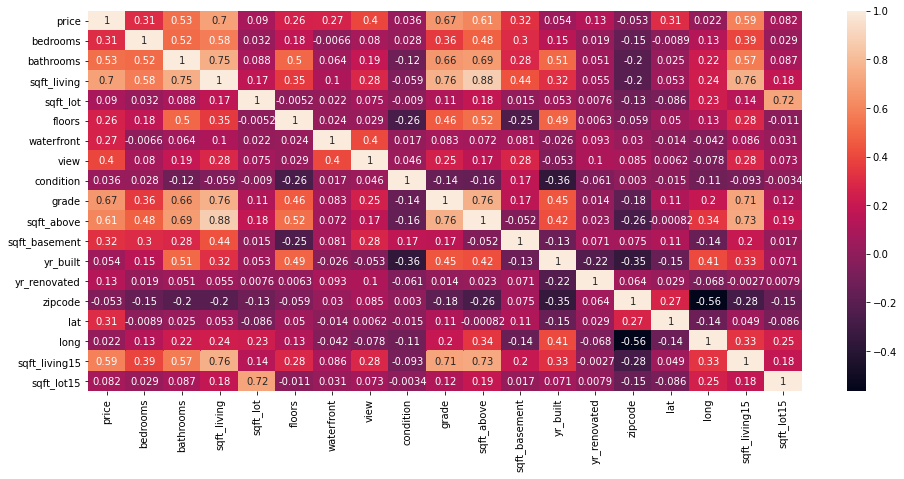

In [10]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))
#TO RESIZE THE PLOTS
resizeplot(16,7)
sns.heatmap(house.corr(),annot=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

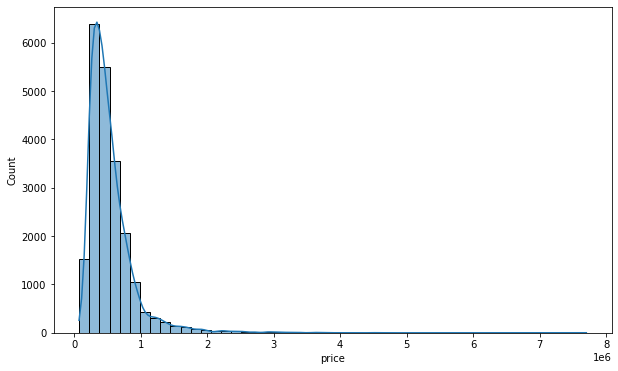

In [11]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a)) #reseizing plots!
resizeplot(10,6)
sns.histplot(house['price'],kde=True,bins=50)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

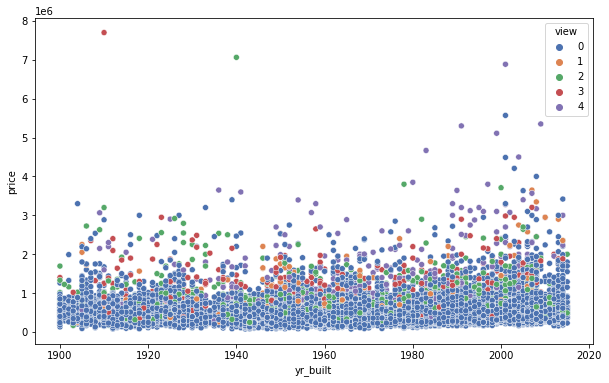

In [13]:
resizeplot(10,6)
sns.scatterplot(x='yr_built',y='price',data=house,hue='view',palette = 'deep')

<AxesSubplot:xlabel='view', ylabel='count'>

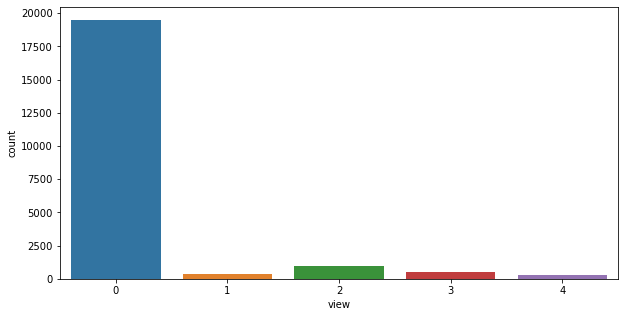

In [14]:
resizeplot(10,5)
sns.countplot(x='view',data=house)

<AxesSubplot:xlabel='waterfront', ylabel='count'>

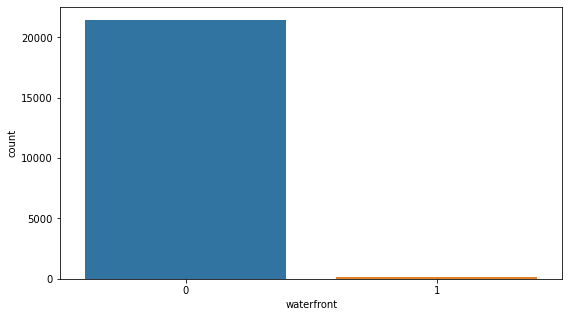

In [15]:
resizeplot(9,5)
sns.countplot(x='waterfront',data=house)

<AxesSubplot:xlabel='grade', ylabel='price'>

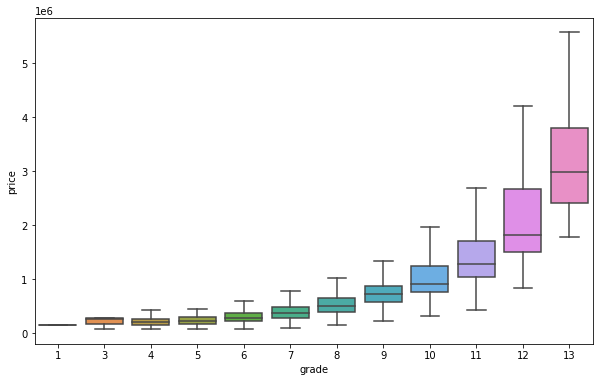

In [16]:
resizeplot(10,6)
sns.boxplot(x='grade',y='price',data=house,showfliers=False)

<Figure size 720x432 with 0 Axes>

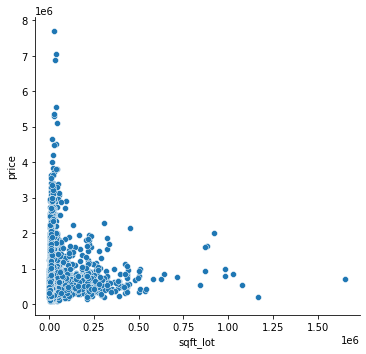

In [34]:
resizeplot(10,6)
sns.relplot(x='sqft_lot',y='price',data=house,palette='terrain')

In [17]:
print('Mean of 1 room with view: ',house.loc[(house['waterfront']==1)&(house['bedrooms']==1)]['price'].mean())
print('Mean of 1 room without view: ',house.loc[(house['waterfront']==0)&(house['bedrooms']==1)]['price'].mean())
print('Mean of 2 rooms with view: ',house.loc[(house['waterfront']==1)&(house['bedrooms']==2)]['price'].mean())
print('Mean of 2 rooms without view: ',house.loc[(house['waterfront']==0)&(house['bedrooms']==2)]['price'].mean())
print('Mean of 3 rooms with view: ',house.loc[(house['waterfront']==1)&(house['bedrooms']==3)]['price'].mean())
print('Mean of 3 rooms without view: ',house.loc[(house['waterfront']==0)&(house['bedrooms']==3)]['price'].mean())
print('Mean of 4 rooms with view: ',house.loc[(house['waterfront']==1)&(house['bedrooms']==4)]['price'].mean())
print('Mean of 4 rooms without view: ',house.loc[(house['waterfront']==0)&(house['bedrooms']==4)]['price'].mean())

Mean of 1 room with view:  622680.0
Mean of 1 room without view:  309781.1030927835
Mean of 2 rooms with view:  918567.4838709678
Mean of 2 rooms without view:  395497.62183950166
Mean of 3 rooms with view:  1526424.21875
Mean of 3 rooms without view:  459279.99887295085
Mean of 4 rooms with view:  1928485.0
Mean of 4 rooms without view:  627859.9280912013


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

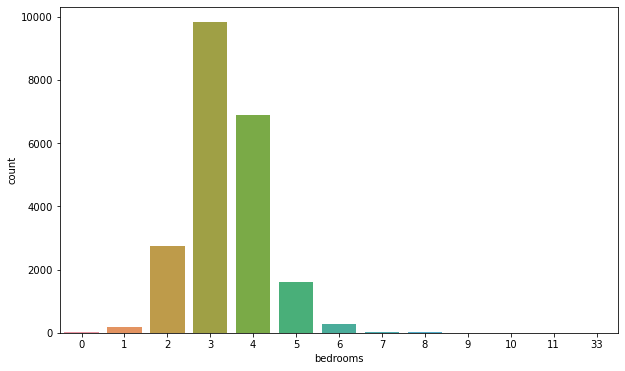

In [18]:
resizeplot(10,6)
sns.countplot(x='bedrooms',data=house)

## Creating model(multi-linear and polynomial regresion)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = house[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
Y = house['price'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)
#this model is for the polynomial regression and multi linear regression because there is too many inputs

## normalize the data

In [22]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics
std = StandardScaler()
X = std.fit_transform(X)

## multi-linear regression

In [6]:
#mlr is multi-linear regression
mlr = LinearRegression()
mlr.fit(X_train,Y_train)

LinearRegression()

In [19]:
pred_mlr = mlr.predict(X_test)
score_mlr = mlr.score(X_train,Y_train)
print(score_mlr)

0.6037060351773105


In [18]:
mlr.coef_[0]

-16504.188458418103

In [20]:
mlr.intercept_

-692007.9820320702

In [25]:
preco_mlr = house['price']
predict_mlr = pd.Series(pred_mlr)
error_mlr = preco_mlr-predict_mlr
data_mlr = {'Price':preco_mlr,'Predictions':predict_mlr,'Error':error_mlr}
data_prev_mlr = pd.DataFrame(data_mlr)
data_prev_mlr.head()

,Price,Predictions,Error
0,221900.0,384260.712892,-162360.712892
1,538000.0,200149.306280,337850.693720
2,180000.0,656015.361663,-476015.361663
3,604000.0,770591.312979,-166591.312979
4,510000.0,416366.208160,93633.791840


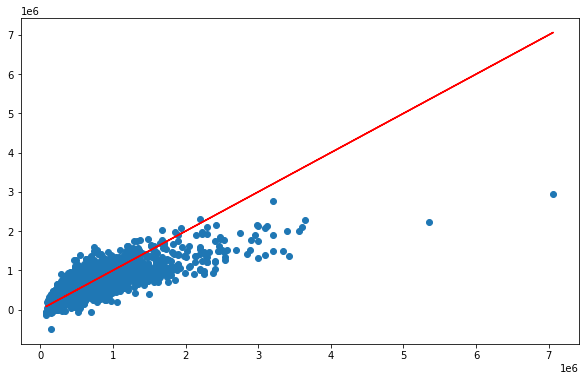

In [27]:
resizeplot(10,6)
plt.scatter(Y_test,pred_mlr)
#Ploting our model
plt.plot(Y_test,Y_test,color='red')

In [118]:
print("MSE", mean_squared_error(Y_test,pred_lr))
print("R squared testing", metrics.r2_score(Y_test,pred_lr))
print("Mae" ,mean_absolute_error(Y_test,pred_lr))

MSE 53187007818.69321
R squared testing 0.6134883795110303
Mae 152838.11248940052


## linear regression

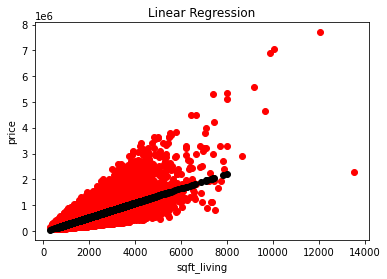

In [24]:
#creating a model of the linear regression

x = house['sqft_living'].values[:,np.newaxis]
y = house['price'].values

# split the data to training and testing data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# creat our linear  regression model and traning it

model=LinearRegression()   
model.fit(x_train,y_train)  

# prdict the Y_test and Y_train

predicted=model.predict(x_test)
predicted_train=model.predict(x_train)


#plot the liniar regression model
plt.scatter(x,y,color='r')
plt.title('Linear Regression')
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.scatter(x_test,model.predict(x_test),color="k")
plt.show()

In [93]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared testing", metrics.r2_score(y_test,predicted))
print("R squared_training", metrics.r2_score(y_train,predicted_train))

MSE 62451720102.954
R squared testing 0.5035535751151091
R squared_training 0.49036986182236686


#### we see that r² is 0.5  less than multi-linear regression and the difference between R² of training and testing if 0.01 which means it's low

## polynomial regression

In [49]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
mlr.fit(X_train_poly,Y_train)

LinearRegression()

In [48]:
score_poly = mlr.score(X_train_poly,Y_train)
print(score_poly)

0.765209989472086


In [47]:
pred_poly = mlr.predict(X_test_poly)
pred_poly[0]

390421.91369529767

In [51]:
print('Mae_poly:',mean_absolute_error(Y_test,pred_poly))
print('Mse_poly:',mean_squared_error(Y_test,pred_poly))
print('Rmse_poly:',np.sqrt(mean_squared_error(Y_test,pred_poly)))

Mae_poly: 359107.3734316832
Mse_poly: 163488265553129.4
Rmse_poly: 12786252.991127988
